In [16]:
!pip install -r requirements.txt

### 1. Import Dependencies

In [17]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

### 2. Basic Processing

In [18]:
df = pd.read_csv('data/processed/CEHHbInToW_Missing_Value_Handled.csv')
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


### 3. outlier detection techniques


#### 3.1 Distribution Plots 

In [25]:
categorical_columns = [
    'Geography',
    'Gender',
    'HasCrCard',
    'IsActiveMember',
    'Exited'
]

numerical_columns=[
    'Age',
    'Tenure',
    'Balance',
    'EstimatedSalary',
    'CreditScore',
    'NumOfProducts'
]

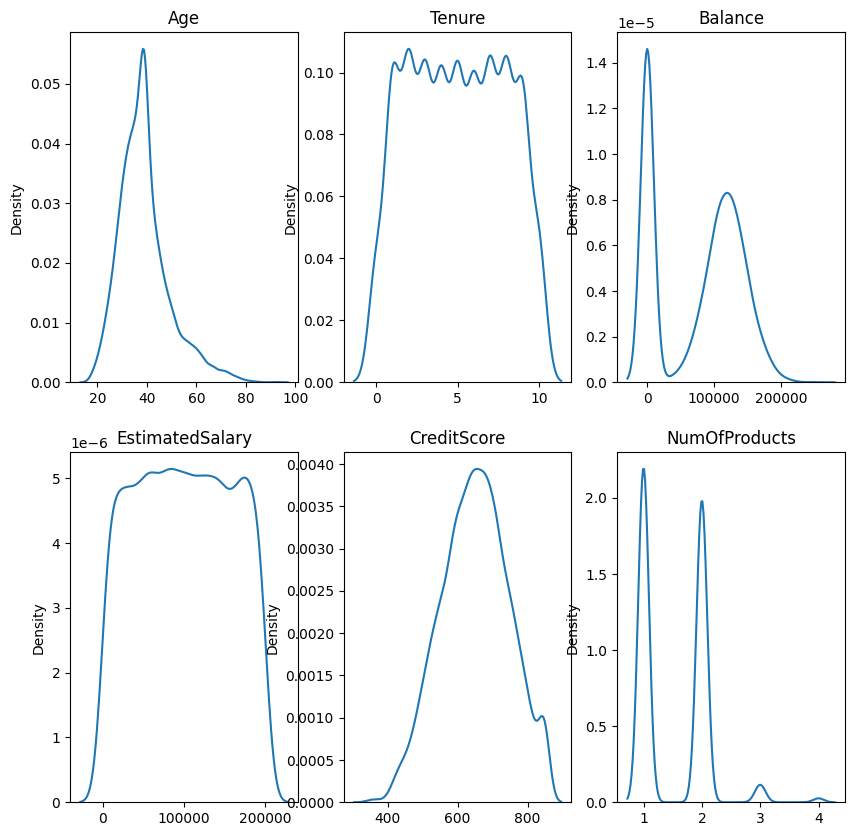

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(10,10))
axes = axes.flatten()

for idx , col in enumerate(numerical_columns):
    sns.kdeplot(
        data=df[col],
        ax= axes[idx]
        )
    axes[idx].set_title(col)
    axes[idx].set_xlabel('')
plt.show()    

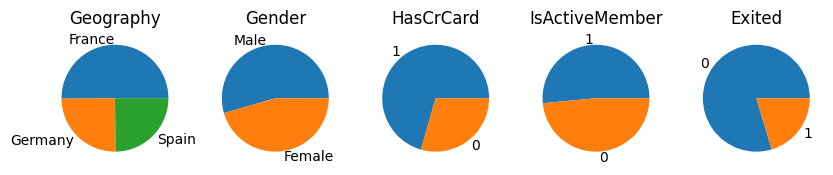

In [31]:
fig, axes = plt.subplots(1, 5, figsize=(10,10))
for idx , col in enumerate(categorical_columns):
    df[col].value_counts().plot(
        kind='pie',
        ax = axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_ylabel('')
plt.show()

#### 3.2 Box Plots 

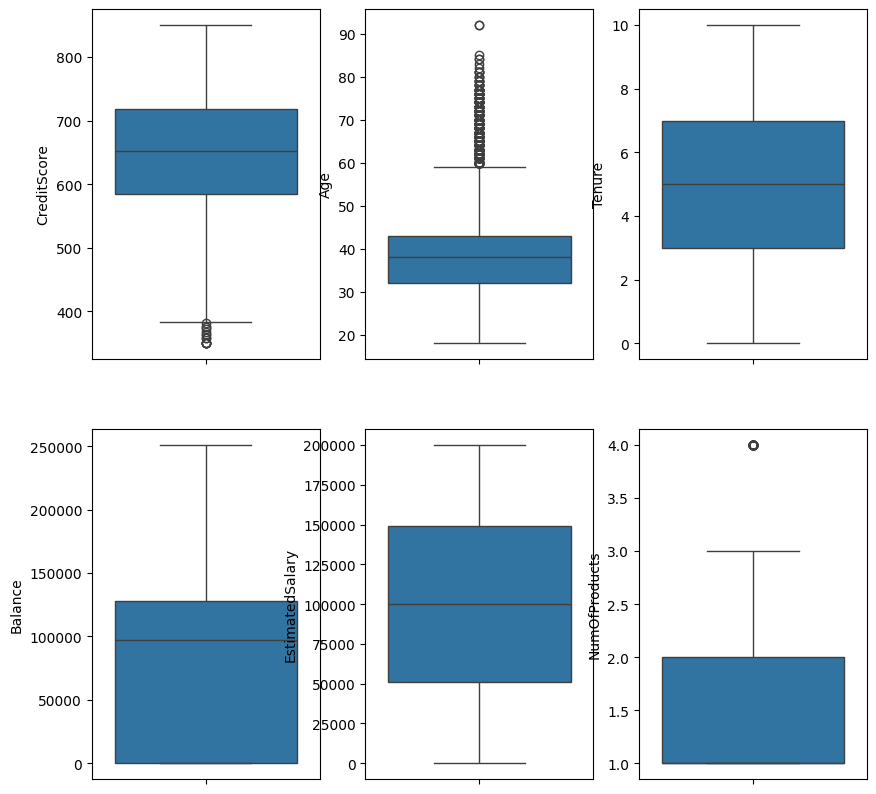

In [34]:
numerical_columns=[
    'Age',
    'Tenure',
    'Balance',
    'EstimatedSalary',
    'CreditScore',
    'NumOfProducts'
]

fig, axes = plt.subplots(2, 3, figsize=(10,10))

sns.boxplot(data=df['CreditScore'], ax=axes[0,0])
sns.boxplot(data=df['Age'], ax=axes[0,1])
sns.boxplot(data=df['Tenure'], ax=axes[0,2])
sns.boxplot(data=df['Balance'], ax=axes[1,0])
sns.boxplot(data=df['EstimatedSalary'], ax=axes[1,1])
sns.boxplot(data=df['NumOfProducts'], ax=axes[1,2])

plt.show()

#### 3.3 Empirical Rule  / 3-Sigma Rule

In [35]:
def find_anomaly(data):

    mean = data.mean()
    std = data.std()

    upper_bound = mean + (3 * std)
    lower_bound = mean - (3 * std)

    return (data > upper_bound) | (data < lower_bound)

In [40]:
numerical_columns=[
    'Age',
    'Tenure',
    'Balance',
    'EstimatedSalary',
    'CreditScore'
]

for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outliers_percentage = round(n_outliers / len(df), 3)
    print(f"{col} : {n_outliers} outliers ({n_outliers_percentage} %)")

Age : 144 outliers (0.014 %)
Tenure : 0 outliers (0.0 %)
Balance : 0 outliers (0.0 %)
EstimatedSalary : 0 outliers (0.0 %)
CreditScore : 8 outliers (0.001 %)


#### 3.4 IQR Method

In [ ]:
def find_anomaly(data):
     